# **영화 리뷰 지수와 흥행의 엇박자, 엇박자 속에서 발견되는 정박자의 순간들**

작성자: 김민채

## **프로젝트 목표**
유명 **영화 리뷰** 사이트 **지수**와 **흥행**의 상관관계 분석 프로젝트<br>
<br>
우리는 영화를 선택할 때 신뢰도가 높아보이는 영화 리뷰를 참고하곤 한다.  
평균 약 2시간 가량을 참고 인내할만한 흥미로운 영화를 보고 싶기 때문이다.  
**관객수가 곧 흥행**과 직결되는 상황에서 **흥행에 성공한 영화는 잘 만든 영화라는 인상**이 크다.   
이왕이면 **'잘 만든 영화를 보고 싶은 사람들은'** 영화 리뷰 사이트를 신경쓰지 않을 수 없다. 
### **그런데 정말, 영화 리뷰 지수가 흥행과 관련성이 높을까?**  


## **프로젝트 가설**
**주제**:<br>
유명 영화 리뷰 사이트 지수와 영화흥행의 상관관계 분석을 통한 공신력 검증<br>
<br> 

**귀무가설**:<br>
유명 영화 리뷰 사이트 지수와 영화흥행은 상관관계가 없다.<br>
<br>


**가설 검증 방향**:<br>
1. 각 영화 리뷰 지수의 분포도 확인 및 해당 지수의 평균 흥행성적 확인 
- 리뷰 지수 별 특성 파악<br>
  - kdeplot 및 displot 적용
2. 각 영화 리뷰 지수와 영화 흥행 수익 간 상관관계 여부 분석
- 상관관계 분석(correlation)
  - heatmap으로 피어슨 상관계수 시각화
  - scatter plot 적용
  - scipy.stats의 chi2_contingency 적용<br>
<br>
3. 정리
- RTCritic, RTFan, IMDb, Metacritic 모두 매우 높은나 BoxOffice는 처참한 경우
- RTCritic, RTFan, IMDb, Metacritic 모두 보통 /낮으나 BoxOffice는 흥행한 경우
<br>






## **환경설정**

In [1]:
### load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import chi2_contingency

In [2]:
### auto resize
%matplotlib inline

In [3]:
### pandas display option float format
pd.options.display.float_format = '{:.2f}'.format

In [4]:
# ### install pandas profiling for description of df
# !pip install pandas-profiling==2.7.1
# from pandas_profiling import ProfileReport

In [5]:
### upload csv file method1
from google.colab import files
uploaded = files.upload()

Saving MoviesData.csv to MoviesData.csv


## **데이터셋**
**MoviesData.csv**<br>
[Comparing Numerical Movie Review Scores:
RottenTomatoes VS Metacritic VS IMDb](https://www.kaggle.com/antallen/comparing-numerical-movie-review-scores)<br>
<br>
## **특성**                    
- Titles : 영화 제목
- Rating : 영화 관람 등급 (G > PG> PG-13 > R > NG 순으로 관람 허용 범위가 크다.) 
- RTCritic : 로튼토마토 전문 평론가 점수 (RT의 Tomatometer 지표)
- RTFan : 로튼토마토 일반 유저 호평 점수 (RT의 Popcorn bucket 지표)
- IMDb : Internet Movie Database의 일반 유저 평가 
- Metacritic : Metacritic의 전문 평론가 점수 (Metacritic의 Metascore 지표) 
- BoxOffice : 영화 흥행 수익 (domestic revenue로서 북미를 의미한다.)
- Year : 년도 
- Action : 액션 영화  
- Animation : 애니메이션 영화 
- Family : 가족 영화
- Scifi : 공상과학 영화
- Comedy : 코미디 영화
- Drama : 드라마 영화
- International : 국제 영화 (미국 외 국가 영화)  
- Romance : 로맨스 영화
- Horror : 공포 영화
- Mystery : 미스테리 영화
- Documentary : 다큐멘터리 영화

In [6]:
# load csv

df = pd.read_csv('MoviesData.csv')

In [7]:
df.head()

,Titles,Rating,RTCritic,RTFan,IMDb,Metacritic,BoxOffice,Year,Action,Animation,Family,Scifi,Comedy,Drama,International,Romance,Horror,Mystery,Documentary
0,Treasure Planet,PG,69,70,7.10,60,38120554,2002,1,1,1,1,0,0,0,0,0,0,0
1,About Schmidt,R,85,74,7.20,85,65005217,2002,0,0,0,0,1,1,0,0,0,0,0
2,Secretary,R,76,82,7.00,63,4046737,2002,0,0,0,0,1,1,1,1,0,0,0
3,Irreversible,NR,57,80,7.40,51,792200,2002,0,0,0,0,0,1,1,0,0,0,0
4,Big Trouble,PG13,48,54,6.50,47,7262288,2002,0,0,0,0,1,1,0,0,0,0,0


In [8]:
df.shape

(225, 19)

In [9]:
# ### df description through by pandas_profile

# profile = ProfileReport(df)
# profile.to_file('movies_report.html')

In [10]:
df.isnull().sum()

Titles           0
Rating           0
RTCritic         0
RTFan            0
IMDb             0
Metacritic       0
BoxOffice        0
Year             0
Action           0
Animation        0
Family           0
Scifi            0
Comedy           0
Drama            0
International    0
Romance          0
Horror           0
Mystery          0
Documentary      0
dtype: int64

### **가설 검증을 위한 데이터셋 추출**

본 프로젝트는 유명 영화 리뷰 사이트 지수와 흥행성적의 상관관계를 분석하고자 한다.<br>
따라서 RTCritic, RTFan, IMDb, Metacritic만을 추출해 가설 검증을 진행하겠다.

In [11]:
mv_indices = df.iloc[ : , 2 : 7]

In [12]:
mv_indices

,RTCritic,RTFan,IMDb,Metacritic,BoxOffice
0,69,70,7.10,60,38120554
1,85,74,7.20,85,65005217
2,76,82,7.00,63,4046737
3,57,80,7.40,51,792200
4,48,54,6.50,47,7262288
...,...,...,...,...,...
220,50,82,7.30,48,52853219
221,61,77,7.10,56,19115191
222,9,63,4.30,22,20773069
223,54,48,6.00,55,79042440


In [13]:
mv_indices.shape

(225, 5)

## **가설 검증**

### **1. 각 영화 리뷰 지수의 분포도 확인 및 해당 지수의 평균 흥행성적 확인**
- 리뷰 지수 별 특성 파악<br>
  - kdeplot 및 displot 적용

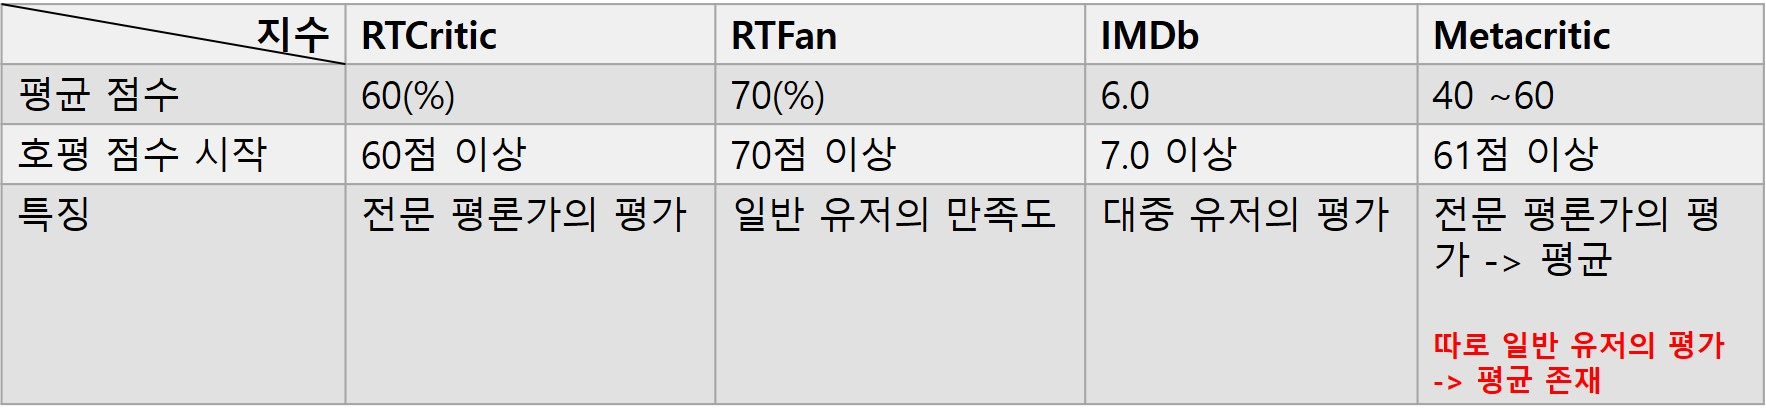

- RT란 Rotten Tomatoes를 의미한다.  
(**RTCritic**은 RT의 Tomatometer 지표로서 **전문 평론가의 평가**를 나타낸다. **60이면 평균**이고 클수록 호평 받은 퍼센트지가 많다는 걸 뜻한다.   
한편, **RTFan**은 RT의 Popcorn bucket 지표로서 **일반 유저의 만족도**를 나타낸다.  
5점 만점에 3.5인 **70%가 평균**이고 **70% 이상의 평가**를 받을 경우 **일반 유저들로부터 호평**을 받은 것으로 해석한다.)  
- IMDb란 Internet Movie Database의 유저 평가이다.  
(IMDb는 전세계 1위 트래픽 유저 수를 지니고 있으므로 다른 영화 리뷰 지수에 비해 **대중적인 평가로 볼 수 있다는 시선이 있다.**      
 **6.0은 괜찮게 볼 수 있는 영화** 정도로 해석되고, **8.0은 대중성을 겸비한 명작**을 의미한다.   
 5.0은 즐기기에 좋은 killing time용 popcorn movie로 해석하고, 그 미만은 좋지 않다고 본다.)  
- **Metacritic**은 Metacritic의 Metascore를 의미하고, **전문 평론가의 평가**를 **평균** 내 지표로 활용한다.  
(주로 신문, 잡지와 같은 매체의 평론이 주를 이뤄 신뢰성은 높으나 동일한 이유로 RT에 비해 평가 수 자체는 적은 편이다.  
  **61부터 호평을 받은 영화** 로 해석되며, 40에서 60사이는 평균적이나 다소 평가자에 따라 엇갈리는 판단을 받았다고 해석하면 된다.)

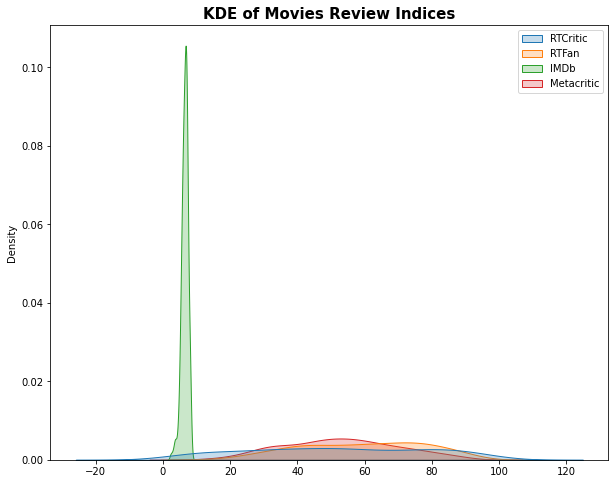

In [14]:
### KDE of Movies Review Indicies

plt.figure(figsize=(10,8))
sns.kdeplot(data = mv_indices.iloc[ : , : 4], shade = True)

plt.title('KDE of Movies Review Indices', fontsize = 15, fontweight = 'bold')
plt.show()

다른 영화 리뷰 지수는 평가 점수 스펙트럼이 크기 때문에 평균도 높고 다양하게 평가되어 있어 분포 모양 역시 넓게 퍼져있다.<br>
그러나 IMDb는 0에서 10점 사이라는 스펙트럼 안에서 5에서 7점 사이에 밀집되어 있다보니 뾰족한 모양의 분포를 띈다.

<Figure size 720x576 with 0 Axes>

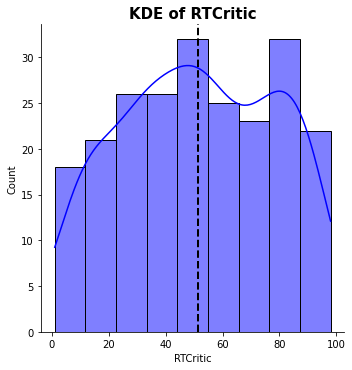

In [15]:
### KDE of RTCritic

plt.figure(figsize=(10,8))
sns.displot(data = mv_indices, x = 'RTCritic', color = 'blue', kde = True)
plt.axvline(mv_indices['RTCritic'].values.mean(), color = 'k', linestyle = 'dashed', linewidth = 2)
plt.title('KDE of RTCritic', fontsize = 15, fontweight = 'bold')
plt.show()

RTCritic은 50에서 60점 사이의 평가가 가장 많았다.<br>
대체적으로 여러 점수대에 골고루 분포되어 있는 경향을 보였다.

<Figure size 720x576 with 0 Axes>

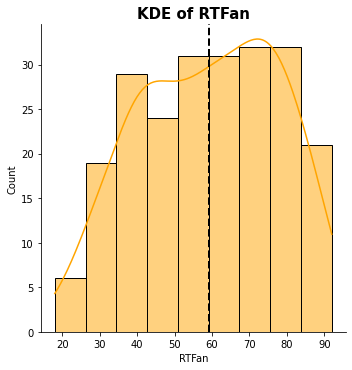

In [16]:
### KDE of RTFan

plt.figure(figsize=(10,8))
sns.displot(data = mv_indices, x = 'RTFan', color = 'orange', kde = True)
plt.axvline(mv_indices['RTFan'].values.mean(), color = 'k', linestyle = 'dashed', linewidth = 2)
plt.title('KDE of RTFan', fontsize = 15, fontweight = 'bold')
plt.show()

RTFan은 RT의 일반 유저 만족도로서 70점 및 80점대의 평가가 가장 많았다.<br>
의외로 낮은 점수대는 극히 적은 편이었다.<br>

<Figure size 720x576 with 0 Axes>

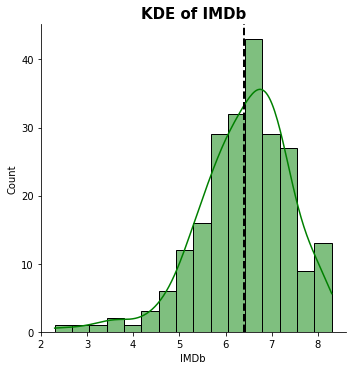

In [17]:
### KDE of IMDb

plt.figure(figsize=(10,8))
sns.displot(data = mv_indices, x = 'IMDb', color = 'green', kde = True)
plt.axvline(mv_indices['IMDb'].values.mean(), color = 'k', linestyle = 'dashed', linewidth = 2)
plt.title('KDE of IMDb', fontsize = 15, fontweight = 'bold')

plt.show()

IMDb는 다른 영화 리뷰 지수보다 평균인 6.0에서 7.0에 높은 밀도를 보였다.

<Figure size 720x576 with 0 Axes>

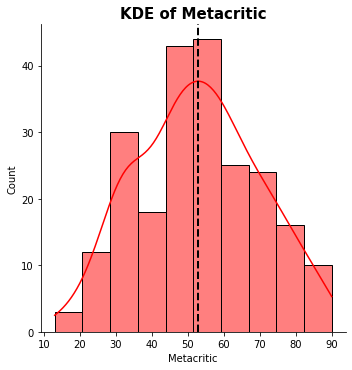

In [18]:
### KDE of Metacritic

plt.figure(figsize=(10,8))
sns.displot(data = mv_indices, x = 'Metacritic', color = 'red', kde = True)
plt.axvline(mv_indices['Metacritic'].values.mean(), color = 'k', linestyle = 'dashed', linewidth = 2)
plt.title('KDE of Metacritic', fontsize = 15, fontweight = 'bold')
plt.show()

Metacritic은 매체의 전문 평론가의 평가를 평균내 지수화 한다.<br>
따라서 40점대부터 50대 사이가 가장 많은 수를 차지했다.<br>
평균 점수이므로 가장 낮거나 높은 점수는 많지 않았다.

### **2. 각 영화 리뷰 지수와 영화 흥행 수익 간 상관관계 여부 분석**
- 상관관계 분석(correlation)
  - heatmap으로 피어슨 상관계수 시각화
  - scatter plot 적용
  - scipy.stats의 chi2_contingency 적용

In [19]:
mv_indices_corr = mv_indices.corr()

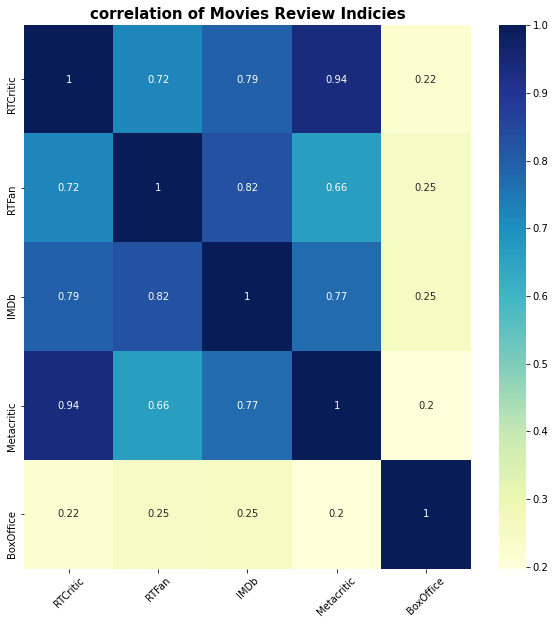

In [20]:
### correlation diagram on violent crime

plt.figure(figsize = (10, 10))
mv_indices_corr = sns.heatmap(mv_indices_corr, annot = True, cmap='YlGnBu')
plt.xticks(rotation=45)
plt.title('correlation of Movies Review Indicies', fontsize = 15, fontweight = 'bold')
plt.show()

피어슨 상관계수를 시각화한 결과, 영화 흥행성적인 BoxOffice와 각 영화 리뷰 사이트 지수는 매우 낮은 상관성을 보였다.<br>

각 영화 리뷰 사이트 지수와 영화 흥행성적의 상관관계를 보다 직관적으로 파악하기 위해 두 변수의 산점도를 그려보았다.

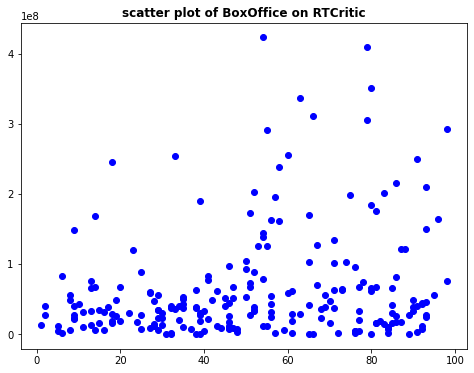

In [21]:
### scatter plot

plt.figure(figsize=(8,6))
plt.scatter(x = mv_indices['RTCritic'], y = mv_indices['BoxOffice'], c = 'blue')
plt.title('scatter plot of BoxOffice on RTCritic', fontsize = 12, fontweight = 'bold')
plt.show()

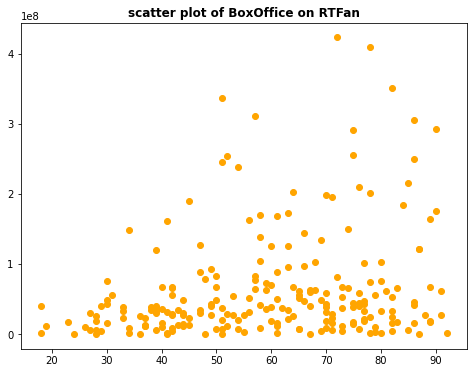

In [22]:
### scatter plot

plt.figure(figsize=(8,6))
plt.scatter(x = mv_indices['RTFan'], y = mv_indices['BoxOffice'], c = 'orange')
plt.title('scatter plot of BoxOffice on RTFan', fontsize = 12, fontweight = 'bold')
plt.show()

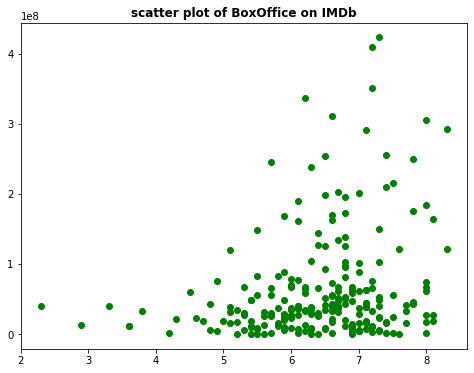

In [23]:
### scatter plot

plt.figure(figsize=(8,6))
plt.scatter(x = mv_indices['IMDb'], y = mv_indices['BoxOffice'], c = 'green')
plt.title('scatter plot of BoxOffice on IMDb', fontsize = 12, fontweight = 'bold')
plt.show()

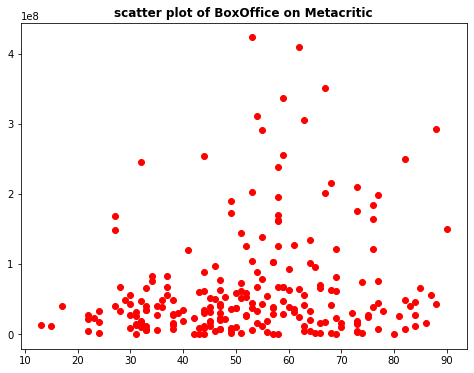

In [24]:
### scatter plot

plt.figure(figsize=(8,6))
plt.scatter(x = mv_indices['Metacritic'], y = mv_indices['BoxOffice'], c = 'red')
plt.title('scatter plot of BoxOffice on Metacritic', fontsize = 12, fontweight = 'bold')
plt.show()

영화 리뷰 지수와 영화 흥행은 점수대 및 영화 흥행성적을 막론하고 상관관계를 전혀 보이지 않았다.

그렇다면 통계적으로 같은 결과가 나올까?<br>
영화 리뷰 지수와 영화 흥행성적, 두 변수의 관련 여부를 검증하고자 카이제곱 독립성 검정을 진행해보았다.

#### **Chi-squared test: RTCritic**

In [25]:
### Ho = RTCritic는 BoxOffice에 영향을 주지 않는다.

test_1 = pd.crosstab(mv_indices['RTCritic'], mv_indices['BoxOffice']).astype('category')
chi2_contingency(test_1)

(19125.000000001215,
 0.3305658941514249,
 19040,
 array([[0.00444444, 0.00444444, 0.00444444, ..., 0.00444444, 0.00444444,
         0.00444444],
        [0.00888889, 0.00888889, 0.00888889, ..., 0.00888889, 0.00888889,
         0.00888889],
        [0.00888889, 0.00888889, 0.00888889, ..., 0.00888889, 0.00888889,
         0.00888889],
        ...,
        [0.00444444, 0.00444444, 0.00444444, ..., 0.00444444, 0.00444444,
         0.00444444],
        [0.00444444, 0.00444444, 0.00444444, ..., 0.00444444, 0.00444444,
         0.00444444],
        [0.00888889, 0.00888889, 0.00888889, ..., 0.00888889, 0.00888889,
         0.00888889]]))

RTCritic과 영화 흥행성적의 카이제곱 독립성검정 결과, 유의 확률은 0.3305으로서 유의 수준 0.05보다 컸다.<br>
따라서 RTCritic과 영화 흥행성적은 서로 관련성이 없었다.


#### **Chi-squared test: RTFan**

In [26]:
### Ho(귀무가설) = RTFan은 BoxOffice에 영향을 주지 않는다.

test_2 = pd.crosstab(mv_indices['RTFan'], mv_indices['BoxOffice']).astype('category')
chi2_contingency(test_2)

(15075.000000001226,
 0.34827043916259864,
 15008,
 array([[0.00888889, 0.00888889, 0.00888889, ..., 0.00888889, 0.00888889,
         0.00888889],
        [0.00444444, 0.00444444, 0.00444444, ..., 0.00444444, 0.00444444,
         0.00444444],
        [0.00444444, 0.00444444, 0.00444444, ..., 0.00444444, 0.00444444,
         0.00444444],
        ...,
        [0.00888889, 0.00888889, 0.00888889, ..., 0.00888889, 0.00888889,
         0.00888889],
        [0.00888889, 0.00888889, 0.00888889, ..., 0.00888889, 0.00888889,
         0.00888889],
        [0.00444444, 0.00444444, 0.00444444, ..., 0.00444444, 0.00444444,
         0.00444444]]))

RTFan과 영화 흥행성적의 카이제곱 독립성검정 결과, 유의 확률은 0.3482으로서 유의 수준 0.05보다 컸다.<br>
따라서 RTFan과 영화 흥행성적은 서로 관련성이 없었다.


#### **Chi-squared test: IMDb**

In [27]:
# Chi-squared test 3)  

# Ho(귀무가설) = IMDb는 BoxOffice에 영향을 주지 않는다.
# pd.crosstab()

test_3 = pd.crosstab(mv_indices['IMDb'], mv_indices['BoxOffice']).astype('category')
chi2_contingency(test_3)

(9675.000000000486,
 0.37670298339930475,
 9632,
 array([[0.00444444, 0.00444444, 0.00444444, ..., 0.00444444, 0.00444444,
         0.00444444],
        [0.00444444, 0.00444444, 0.00444444, ..., 0.00444444, 0.00444444,
         0.00444444],
        [0.00444444, 0.00444444, 0.00444444, ..., 0.00444444, 0.00444444,
         0.00444444],
        ...,
        [0.03555556, 0.03555556, 0.03555556, ..., 0.03555556, 0.03555556,
         0.03555556],
        [0.01333333, 0.01333333, 0.01333333, ..., 0.01333333, 0.01333333,
         0.01333333],
        [0.00888889, 0.00888889, 0.00888889, ..., 0.00888889, 0.00888889,
         0.00888889]]))

IMDb와 영화 흥행성적의 카이제곱 독립성검정 결과, 유의 확률은 0.3767으로서 유의 수준 0.05보다 컸다.<br>
따라서 IMDb와 영화 흥행성적은 서로 관련성이 없었다.


#### **Chi-squared test: Metacritic**

In [28]:
### Ho(귀무가설) = Metacritic은 BoxOffice에 영향을 주지 않는다.

test_4 = pd.crosstab(df['Metacritic'], df['BoxOffice']).astype('category')
chi2_contingency(test_4)

(14850.000000001539,
 0.3493297470181269,
 14784,
 array([[0.00444444, 0.00444444, 0.00444444, ..., 0.00444444, 0.00444444,
         0.00444444],
        [0.00444444, 0.00444444, 0.00444444, ..., 0.00444444, 0.00444444,
         0.00444444],
        [0.00444444, 0.00444444, 0.00444444, ..., 0.00444444, 0.00444444,
         0.00444444],
        ...,
        [0.00444444, 0.00444444, 0.00444444, ..., 0.00444444, 0.00444444,
         0.00444444],
        [0.00888889, 0.00888889, 0.00888889, ..., 0.00888889, 0.00888889,
         0.00888889],
        [0.00444444, 0.00444444, 0.00444444, ..., 0.00444444, 0.00444444,
         0.00444444]]))

Metacritic과 영화 흥행성적의 카이제곱 독립성검정 결과, 유의 확률은 0.3493으로서 유의 수준 0.05보다 컸다.<br>
따라서 Metacritic과 영화 흥행성적은 서로 관련성이 없었다.


### **3. 정리**

영화 흥행 성적은 RTCritic, RTFan, IMDb, Metacritic 그 어느 것과도 상관관계에 놓여있지 않았다.

데이터셋에서 이를 확인하고자 각 영화 리뷰 지수의 기준점을 상회한 경우 f로 그렇지 않은 경우 h로 선별되는 새로운 특성 변수를 만들어 보았다.

In [29]:
### class = favorable comment / harsh comment

favorable = (df['RTCritic'] > 60) & (df['RTFan'] > 70) & (df['IMDb'] > 6.0) & (df['Metacritic'] > 60)
df['class'] = np.where(favorable, 'f', 'h')

In [30]:
top_10 = df.sort_values(by = ['BoxOffice'], ascending = False, axis =0).head(10)

In [31]:
top_10

,Titles,Rating,RTCritic,RTFan,IMDb,Metacritic,BoxOffice,Year,Action,Animation,Family,Scifi,Comedy,Drama,International,Romance,Horror,Mystery,Documentary,class
74,Pirates of the Caribbean: Dead Man's Chest,PG13,54,72,7.30,53,423315812,2006,1,0,0,1,1,0,0,0,0,0,0,h
170,Iron Man 3,PG13,79,78,7.20,62,408992272,2013,1,0,0,1,0,0,0,0,0,0,0,f
209,Furious 7,PG13,80,82,7.20,67,351032910,2015,1,0,0,0,0,0,0,0,0,1,0,f
89,Spider-Man 3,PG13,63,51,6.20,59,336530303,2007,1,0,0,1,0,0,0,0,0,1,0,h
10,Star Wars: Episode II - Attack of the Clones,PG,66,57,6.60,54,310676740,2002,0,0,0,1,0,0,0,0,0,0,0,h
20,Pirates of the Caribbean: The Curse of the Bla...,PG13,79,86,8.00,63,305411224,2003,1,0,0,1,0,0,0,0,0,0,0,f
110,Up,PG,98,90,8.30,88,293004164,2009,1,1,1,0,1,0,0,0,0,0,0,f
174,Man of Steel,PG13,55,75,7.10,55,291045518,2013,1,0,0,1,0,0,0,0,0,0,0,h
183,The Hobbit: The Battle of the Five Armies,R,60,75,7.40,59,255119788,2014,1,0,0,1,0,0,0,0,0,0,0,h
146,The Hangover Part II,R,33,52,6.50,44,254464305,2011,0,0,0,0,1,0,0,0,0,0,0,h


In [32]:
top_10['class'].value_counts()

h    6
f    4
Name: class, dtype: int64

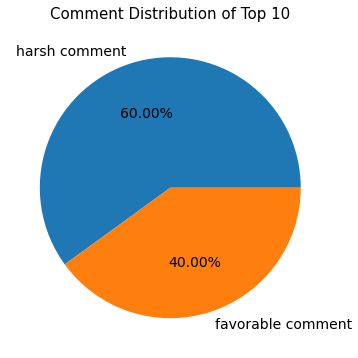

In [33]:
plt.figure(figsize=(8,6))
plt.pie(top_10['class'].value_counts(), autopct = '%1.2f%%', textprops = {'fontsize' : 14}, labels = ['harsh comment', 'favorable comment'])
plt.title('Comment Distribution of Top 10', fontsize = 15)
plt.show()

흥행에 성공한 상위 10위 영화의 40%만이 모든 유명 영화 리뷰 사이트 지수에서 좋은 평가를 받았을 뿐이었다.<br>
다시 말해 흥행에 성공했을지라도 모든 리뷰 지수가 "좋은 영화"라는 평가를 하진 않았다는 것이다.<br>

2002년부터 2016년까지 개봉된 영화 중 영화 흥행성적과 무관한 사례는 대표적으로 다음과 같다.<br>


#### RTCritic, RTFan, IMDb, Metacritic 모두 매우 높은나 BoxOffice는 처참한 경우 :
#### <Incendies_그을린 사랑>

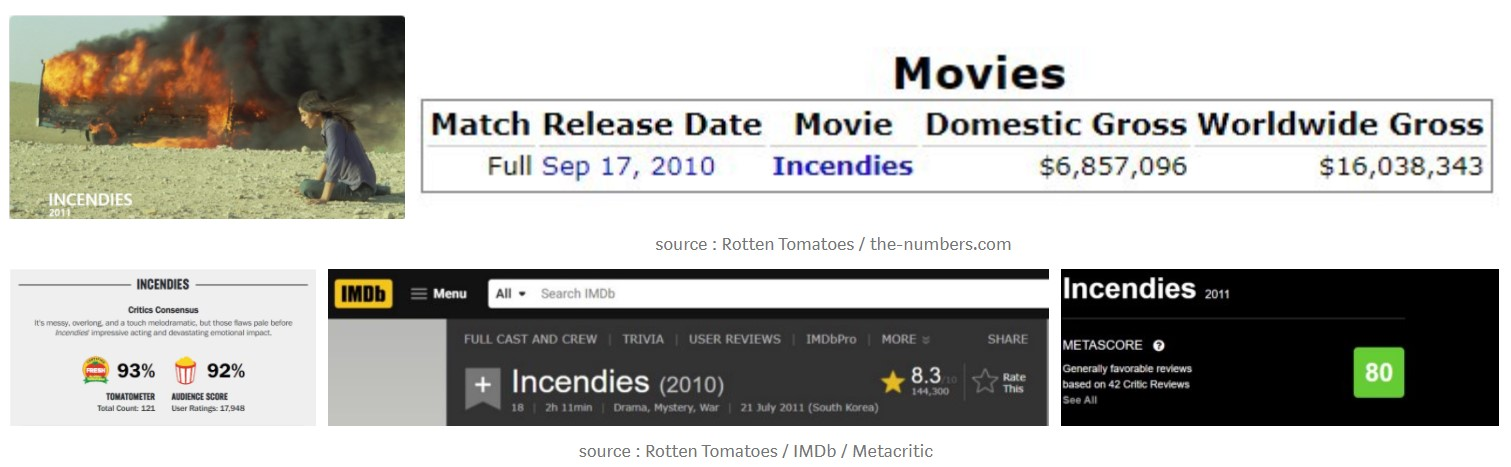

#### RTCritic, RTFan, IMDb, Metacritic 모두 보통 /낮으나 BoxOffice는 흥행한 경우 :   
#### <MR. & Mrs. Smith>

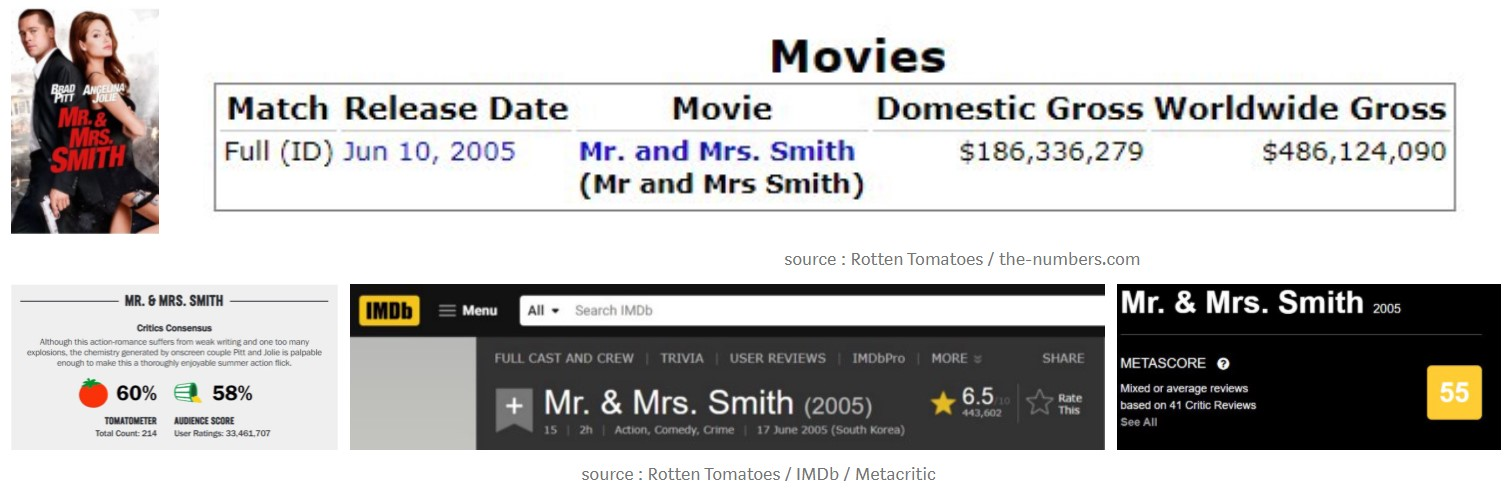

관객의 선택을 많이 받은 영화는 곧 흥행에 성공했다고 본다.<br>
그러나 얼마나 많은 관객의 선택을 받았는지는 해당 영화의 완성도, 재미 그밖의 개개인의 취향을 모두 보장해줄 순 없었다.<br>
영화 흥행에는 사람들이 참고하는 영화 리뷰 지수말고도 많은 것들이 개입되는 모양이었다.<br>
평소 좋아했던 영화 감독 또는 배우의 작품이라는 이유로,<br> 함께 영화를 보는 타인의 영향으로,<br> 평소라면 보지 않았을지라도 그날의 고단함을 해소하기 위해 영화는 갖가지 이유로 선택 받았다.<br>
따라서 영화 리뷰 지수를 곧이 곧대로 신뢰할 필요가 없다.<br>
'잘 만든 영화'는 영화 흥행성적과 영화 리뷰 지수만으로 설명될 수 없기 때문이다.


